# 1. Vectors

A basic understanding of python and numpy arrays is useful for understanding the code snippets.

1. [Basics](#1.-Basics)
2. [Geometric Interpretation](#2.-Geometric-Interpretation)
3. [Unit Basis Vectors](#3.-Unit-Basis-Vectors)
4. [Equality and Assignment](#.-Equality-and-Assignment)
5. [Basic Vector Operations](#.-Basic-Vector-Operations)
6. [Advanced Vector Operations](#.-Advanced-Vector-Operations)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Basics

A vector is an object that has both magnitude and direction. It's a list of values with indexes ranging from 0 to m, or from 1 to m, depending on the convention used. A column vector is an *m* x 1 matrix, having m rows and 1 column. 

$
\begin{align}
x &= \begin{bmatrix}
       x_{0} \\
       x_{1} \\
       \vdots \\
       x_{m}
     \end{bmatrix}
= \begin{bmatrix}
       x_{1} \\
       x_{2} \\
       \vdots \\
       x_{m}
     \end{bmatrix}
\end{align}
$

A row vector is a 1 x *m* matrix, having 1 row and m columns.

$
x = 
\begin{bmatrix}
x_{0} & x_{1} & ... & x_{m}
\end{bmatrix}
$

A vector has a direction and a length, but no location. For simplicity we place all vectors at the origin $(0, 0)$:

In [2]:
# plt.quiver is used to plot vectors, omitting the origin will
# create the same result as providing the (0, 0) origin
origin = [0], [0]

# To speed up creating plots, we create a wrapper function that accepts
# vectors, the origin, and colors for each respective vector
def plot_vectors(*vectors, origins = origin, groups = None, color = None):
           
    # Convert vectors to np array
    V = np.array(vectors)
        
    # Create quiver plot
    plt.quiver(*origins, V[:, 0], V[:, 1], angles = 'xy', scale_units = 'xy', scale = 1, color = color)
    
    # Automatically find the xlim and ylim from vectors
    plt.xlim(min(*origin[0], V[:, 0].min()) - 1, max(*origin[0], V[:, 0].max()) + 1)
    plt.ylim(min(*origin[1], V[:, 1].min()) - 1, max(*origin[1], V[:, 1].max()) + 1)
    
    plt.grid()
    plt.show()

## 2. Geometric Interpretation

A vector:
$x =
\begin{bmatrix}
4 \\
-3
\end{bmatrix}
$

can be geometrically visualized as:

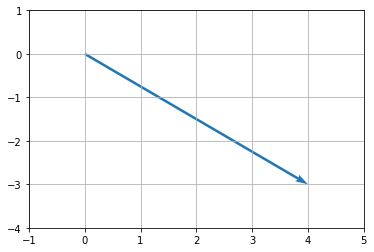

In [3]:
x = np.array([4, -3])
plot_vectors(x)

## 3. Unit Basis Vectors

Unit Basis Vectors, or Standard Basis Vectors are vectors of size m. They have a special property that all entries are equal to zero, except for one of these entries. A basis vector $\langle 1, 0, 0 \rangle$ may represent one unit on the x-axis.

$e_j$ denotes the vector that has a one in the jth entry.

$$
e_j = \begin{bmatrix}
       0 \\
       \vdots \\
       0 \\
       1 \\
       0 \\
       \vdots \\
       0 \\
     \end{bmatrix}
$$

If indexing starts at zero, it means that there are j zero's, then there's a one at the jth index, and the remaining entries are zero's.

$$
e_k = \begin{cases}
0 &\text{se k < j}\\
1 &\text{se k = j}\\
0 &\text{se k > j}
\end{cases}
$$

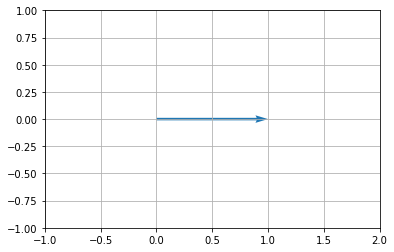

In [4]:
e_0 = np.array([1, 0])
plot_vectors(e_0)

Commonly known unit basis vectors $e_0$ and $e_1$ are often called $\hat\imath$ and $\hat\jmath$.

## 4. Equality and Assignment

### 4.1 Equality

Two vectors $v$ and $w$ are equal iff all the components of both vectors are equal.

$y = x$

$
\begin{align}
y &= \begin{bmatrix}
       \chi_{0} \\
       \chi_{1} \\
       \vdots \\
       \chi_{m}
     \end{bmatrix}
= x = \begin{bmatrix}
       \chi_{0} \\
       \chi_{1} \\
       \vdots \\
       \chi_{m}
     \end{bmatrix}
\end{align}
$

In [5]:
x = np.array([1, 2])
y = np.array([1, 2])

(x == y).all()

True

### 4.2 Assignment

To assign components of a vector x to the corresponding components of y:

$y := x \quad$ (y becomes x)

In [6]:
x = np.array([1, 2])
y = x

y

array([1, 2])

## 5. Basic Vector Operations

- Addition
- Scaling
- Subtraction

### 5.1 Addition

Say we have two vectors, x and y.

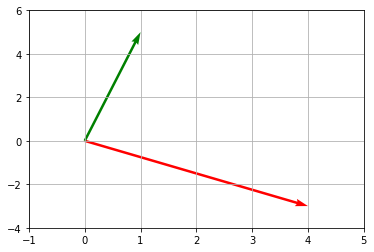

In [7]:
x = np.array([4, -3])
y = np.array([1, 5])

plot_vectors(x, y, color=['r', 'g'])

Adding x and y will result in vector $z = \langle 5, 2 \rangle$:

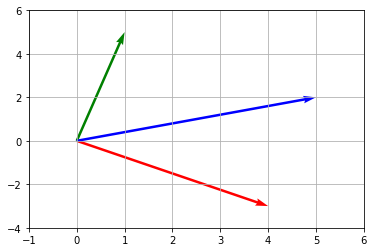

In [8]:
z = x + y

plot_vectors(x, y, z, color=['r', 'g', 'b'])

$
x+y =
\begin{bmatrix}
       4 \\
       -3
     \end{bmatrix}
$$+    \begin{bmatrix}
       1 \\
       5
     \end{bmatrix}
$$=    \begin{bmatrix}
       4 + 1\\
       -3 + 5
     \end{bmatrix}
$$=    \begin{bmatrix}
       5\\
       2
     \end{bmatrix}
= z
$

In order to display x and y laying heel to toe, we must specify the origin of the vectors:

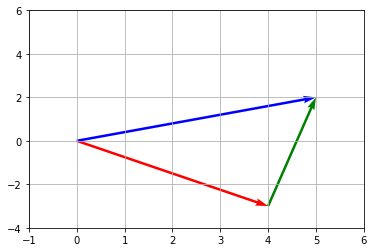

In [9]:
x = np.array([4, -3])
y = np.array([1, 5])
z = x + y

origins = [0, 4, 0], [0, -3, 0]
plot_vectors(x, y, z, origins = origins, color=['r','g','b'])

Of course we could change the order in which we add the two vectors:

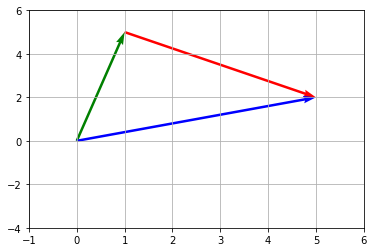

In [10]:
z = y + x

origins = [1, 0, 0], [5, 0, 0]
plot_vectors(x, y, z, origins = origins, color=['r','g','b'])

Vector addition has the following properties:

- Associativity: $(x + y) + z \Leftrightarrow x + (y + z)$ 
- Commutativity: $x + y \Leftrightarrow y + x$

In [11]:
associativity = ((x + y) + z == x + (y + z)).all()
commutativity = (x + y == y + x).all()
print(associativity, commutativity)

True True


### 5.2 Scaling

If we have a vector:
$
\begin{align}
x &= \begin{bmatrix}
       4 \\
       -3
     \end{bmatrix}
\end{align}
$

Adding x to itself is the same as $2 \times x$:

$
\begin{align}
2x &= \begin{bmatrix}
       4 \\
       -3
     \end{bmatrix}
+
\begin{bmatrix}
       4 \\
       -3
     \end{bmatrix}
\end{align}
$

which is:

$
\begin{align}
    \begin{bmatrix}
       8 \\
       -6
     \end{bmatrix}
\end{align}
$

The $2$ in front of $x$ is something called a scalar.

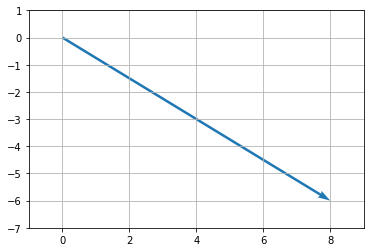

In [12]:
x = np.array([4, -3])
plot_vectors(2 * x)

Scaling by -1/4 will make the vector point in the opposite direction, notice that it's only a quarter as long:

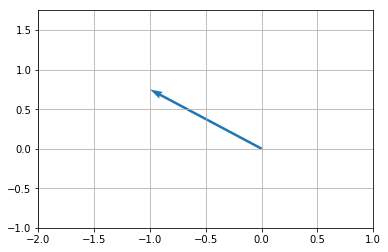

In [13]:
plot_vectors(-1/4 * x)

### 5.3 Subtraction

While adding two vectors, each corresponding individual components must be added. While subtracting vectors, each individual component must be subtracted. Therefore it is true that the associative and commutative properties that do not hold for vector subtraction, as they don't hold for subtraction in general:

Associative:
$
(3 - 5) - 2 = -4\\
3 - (5 - 2) = 6
$

Commutative:
$
3 - 5 = -2\\
5 - 3 = 2
$

Subtracting y from x looks as follows:

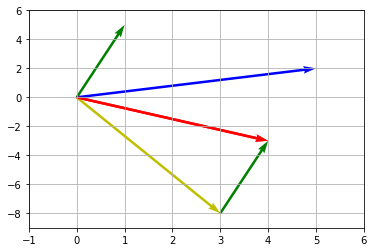

In [14]:
x = np.array([4, -3])
y = np.array([1, 5])

origins = [0, 0, 0, 0, 0, 3], [0, 0, 0, 0, 0, -8]
plot_vectors(x, y, x+y, x-y, x, y, origins=origins, color=['r','g','b', 'y'])

Instead of the blue arrow, we get the green arrow as a result. Notice the way in which y is placed at the head of x.

$
x - y =
\begin{bmatrix}
4 \\
-3
\end{bmatrix}
$
$-
\begin{bmatrix}
1 \\
5
\end{bmatrix}
$
$=
\begin{bmatrix}
4 - 1\\
-3 - 5
\end{bmatrix}
$
$=    
\begin{bmatrix}
3\\
-8
\end{bmatrix}
$

If instead we wish to subtract x from y, we must place x at the head of y:

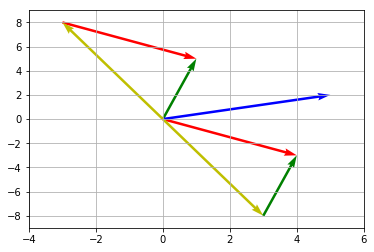

In [15]:
x = np.array([4, -3])
y = np.array([1, 5])

origins = [0, 0, 0, 0, -3, 3, 0], [0, 0, 0, 0, 8, -8, 0]
plot_vectors(x, y, x+y, x-y, x, y, y-x, origins=origins, color=['r','g','b', 'y', 'r', 'g', 'y'])

The result is a vector of the same length, but opposite direction.

$
y - x =
\begin{bmatrix}
1 \\
5
\end{bmatrix}$
$-    \begin{bmatrix}
4 \\
-3
\end{bmatrix}$
$=    \begin{bmatrix}
1 - 4\\
5 - (-3)
\end{bmatrix}$
$=    \begin{bmatrix}
-3\\
8
\end{bmatrix}
$

## 6. Advanced Vector Operations

- AXPY (Alpha X Plus Y)
- Linear Combinations
- Dot or Inner Product
- Vector Length

### 6.1 AXPY (Alpha X Plus Y)

The addition, subtraction, and scaling logic can be combined into scaled vector addition. 
The AXPY function is given by:

$y := \alpha x + y$

We tranform $y$ by adding a scaled vector $x$:

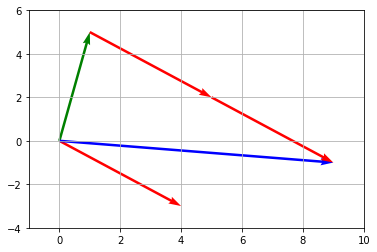

In [16]:
x = np.array([4, -3])
y = np.array([1, 5])
yy = 2 * x + y

origins = [0, 0, 0, 1, 5], [0, 0, 0, 5, 2]
plot_vectors(x, y, yy, x, x, origins = origins, color=['r', 'g', 'b', 'r', 'r'])

### 6.2 Linear Combinations

Let $u, v \in \mathbb{R}^m$ and $\alpha, \beta \in \mathbb{R}$

Taking the linear combination of vectors $u$ and $v$ with the coefficients (scalars) $\alpha$ and $\beta$ is called a linear combination (the expression, or the resulting vector $w$):

$w = \alpha u + \beta v$

A linear combination scales the individual vectors and then adds them.
For example, you could write a vector $x = \langle -3, 2, 0, 4 \rangle$ as a linear combination of unit basis vectors:

In [17]:
# Four unit basis vectors
e_0, e_1, e_2, e_3 = [np.array([1 if j == i else 0 for j in range(4)]) for i in range(4)]

e_1

array([0, 1, 0, 0])

In [18]:
a, b, c, d = -3, 2, 0, 4
x = a * e_0 + b * e_1 + c * e_2 + d * e_3

x

array([-3,  2,  0,  4])

Which is expressed as:

$
x = -3 
     \begin{bmatrix}
       1 \\
       0 \\
       0 \\
       0
     \end{bmatrix}
     $$+ 2 
     \begin{bmatrix}
       0 \\
       1 \\
       0 \\
       0
     \end{bmatrix}
     $$+ 0 
     \begin{bmatrix}
       0 \\
       0 \\
       1 \\
       0
     \end{bmatrix}
     $$+ 4 
     \begin{bmatrix}
       0 \\
       0 \\
       0 \\
       1
     \end{bmatrix}
     $$= 
     \begin{bmatrix}
       -3 \\
       2 \\
       0 \\
       4
     \end{bmatrix}
$

### 6.3 Dot or Inner Product

Let $x, y \in \mathbb{R}^n$. 
Let 
$ x = 
\begin{bmatrix}
       \chi_0 \\
       \chi_1 \\
       \vdots \\
       \chi_{n-1}
     \end{bmatrix}
$
and
$ y = 
\begin{bmatrix}
       \psi_0 \\
       \psi_1 \\
       \vdots \\
       \psi_{n-1}
     \end{bmatrix}
$
.

Then the dot product between $x$ and $y$ is given by:

$$dot(x, y) = \chi_0 \psi_0 + \chi_1 \psi_1 + ... + \chi_{n-1} \psi_{n-1} = \sum_{i=0}^{n-1} \chi_i \psi_i$$

In [19]:
# Instead of * we use @ to calculate the dot product
x = np.array([2, -1, 5])
y = np.array([1, -2, -1])
z = np.array([4, -3, 2])

x @ y

-1

The shorthand of this operation is denoted by:

$x^Ty$

Transpose is an operation that flips a matrix over its diagonal, which will be discussed later, but the resulting expression looks like this:

$
x^Ty = 
\begin{align}
    \begin{bmatrix}
       2 & -1 & 5
    \end{bmatrix}
    \begin{bmatrix}
       1 \\
       -2 \\
       -1
     \end{bmatrix}
\end{align}
$

Dot product has the following properties:

- Orthogonality: Two non-zero vectors a and b are orthogonal if and only if a ⋅ b = 0.
- Commutativity: $x + y \Leftrightarrow y + x$
- Distributivity over vector addition: $(x+y)^Tz \Leftrightarrow x^Tz + y^Tz$

In [20]:
commutativity = x @ y == y @ x
distributivity = (x + y) @ z == x @ z + y @ z
print(commutativity, distributivity)

True True


### 6.4 Vector Length (norm2)

Let $v \in \mathbb{R}^n$.

The size ($n$) is the amount of components in that vector.
The norm ($\lvert v \rvert$) is the Manhattan distance.
The length ($\|v\|_2$) is the Euclidean length, norm, or magnitude.

The Euclidean length of a vector equals the square root of the sum of the squares of its components.

$$\|\mathbf{v}\|_2 := \sqrt{\chi_0^2 + \chi_1^2 + \cdots + \chi_{n-1}^2} = \sqrt{\sum_{i=0}^{n-1} \chi_i^2}$$

Remember the definition of the dot product, which is the sum of the products of the individual components. The vector length is the square root of the dot product of the vector itself:

$$\sqrt{\sum_{i=0}^{n-1} \chi_i^2} = \sqrt{\sum_{i=0}^{n-1} \chi_i \chi_i} = \sqrt{v^Tv}$$

In [21]:
def norm2(vector):
    return sqrt( (vector**2).sum() )

v = np.array([6, 8])
norm2(v)

10.0

### 6.5 Vector Functions

A vector function is a function that takes one or more scalars and/or one
or more vectors as inputs and then produces a vector as an output.

Examples are: 

- AXPY
- Dot

In [22]:
x = np.array([2, -1, 5])
y = np.array([1, -2, -1])

def axpy(a, x, y):
    return a * x + y

def dot(x, y):
    return x @ y

def is_vector(v):
    """Validates input is vector"""
    if type(v) is not np.ndarray:
        raise ValueError('Expected np.ndarray')

axpy(2, x, y)

array([ 5, -4,  9])

Functions that map a vector to another vector have the following signature:
    
$$f : \mathbb{R}^n \rightarrow \mathbb{R}^m$$

The following examples illustrate how vector functions behave when scalars and vectors are given as inputs. The next function adds 1 to the first component, 2 to the second component, etc:

In [23]:
def f(v):
    """Adds the index + 1 to each component"""
    is_vector(v)
    return v + list(range(1, v.size + 1))

x = np.array([6., 3., 2.])
print(f(x))     # 6+1, 3+2, 2+3
print(f(2 * x)) # 2*6+1, 2*3+2, 2*2+3
print(2 * f(x)) # same

[7. 5. 5.]
[13.  8.  7.]
[14. 10. 10.]


The following function adds each component with components with lower indexes:

In [24]:
def f(v):
    """Adds previous component result to current"""
    is_vector(v)
    x = 0
    res = np.zeros(v.size)
    for i, c in enumerate(v):
        res[i] = c + x
        x = res[i]
    return res
        
x = np.array([6., 3., 2.])
print(f(x))     # 6, 3+6, 2+3+6
print(f(2 * x)) # 2*6, 2*3+2*6, 2*2+2*3+2*6
print(2 * f(x)) # same

[ 6.  9. 11.]
[12. 18. 22.]
[12. 18. 22.]
